# **Quantum Computing — the soft way**
### *QPlayLearn*

First of all, we install and import all the packages we are going to need to run the code. 
<br> N.B. Remember to run this cell before every Sandbox!

In [21]:
# Qiskit is the open-source library for quantum computing founded by IBM
import qiskit as qk
from qiskit.quantum_info import Statevector # to get the state coefficients
from qiskit_aer import AerSimulator # to run circuits on the quantum computer simulator
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

# Packages for graphical representations and plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# Math library
import numpy as np

## **QC SANDBOX #1 - Amplitude game**

Let's start by creating a simple quantum circuit with 1 qubit. We can also represent it visually as in the earlier sections of the course.

In [29]:
# Create a quantum circuit with 1 qubit
num_qubits = 1
qc = qk.QuantumCircuit(num_qubits)

# Apply a X gate on the qubit
qc.x(0)

# Play with other single qubit gates!
# qc.y(0)
# qc.h(0)


# Draw a graphical representation of the circuit (using matplotlib)
print(qc)

   ┌───┐
q: ┤ X ├
   └───┘


The X gate transform the initial state into $\ket{\psi_{final}} = X \ket{\psi_{initial}}$. At this point, we should be able to calculate by hand the final state of this and other simple quantum circuits. However, on Qiskit we can quickly check it in the form of the array of coefficients or amplitudes $$ [ a, b], \ \ \  \ket{\psi_{final}} = a \ket{0} + b \ket{1}$$

In [27]:
# Compute the final state of the quantum circuit. Note that j is the imaginary unit
psi = Statevector(qc)
print("|psi_final> = ", psi.data)

|psi_final> =  [0.+0.j 1.+0.j]


We can also visualise the representation of $\ket{\psi_{final}}$ on the Bloch sphere. Is it what you were expecting?

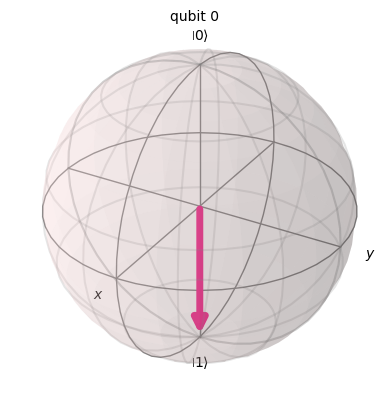

In [6]:
# Plot its representation in the Bloch sphere
plot_bloch_multivector(qc)

We can also visualise a generic single qubit state $\ket{\psi} = a\ket{0} + b\ket{1}$ via the relations between complex coefficients $a$ and $b$ and spherical coordinates of the Bloch sphere $\theta$, $\varphi$. You can check them yourself in the In-depth content of Chapter 2, or just use the function defined below.

For example, let's see the case of $\ket{\psi} = \frac{i}{\sqrt{2}} \ket{0} +\frac{1}{\sqrt{2}} \ket{1}$.

In [34]:
def coeff_to_sphere(a,b):
    """
    Calculate spherical coordinates for the Bloch sphere from state coefficients
    """
    b_phase = np.arctan2( np.imag(b),np.real(b)) 
    a_phase= np.arctan2( np.imag(a),np.real(a))
    phi = b_phase - a_phase

    a_magn = np.sqrt(np.real(a)**2 + np.imag(a)**2)
    theta=2*np.acos(a_magn)
    return theta, phi

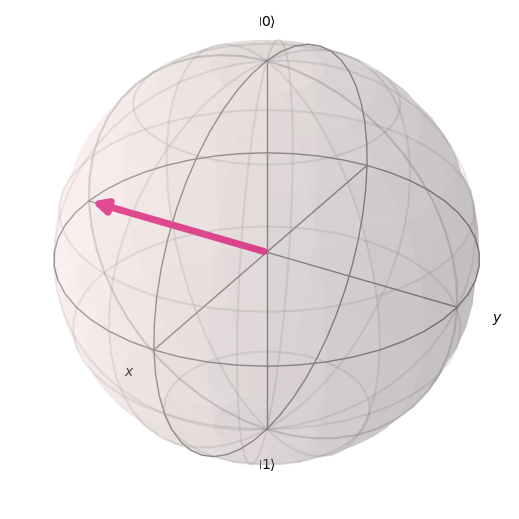

In [26]:
# These are the state coefficients
a = 1j/np.sqrt(2)
b = 1/np.sqrt(2)

# Obtain spherical coordinates
theta, phi = coeff_to_sphere(a,b)

# # Plot its representation in the Bloch sphere, using spherical coordinates this time!
plot_bloch_vector([1, theta, phi], coord_type='spherical')


Ok, let's play the Amplitude Game! <br> Now that you've seen it on the Bloch sphere, build the circuit to realise the final state  $$\ket{\psi} = \frac{i}{\sqrt{2}} \ket{0} +\frac{1}{\sqrt{2}} \ket{1}$$
Suggestion: remember how each gate acts on the Bloch sphere!

   
q: 
   
|psi> =  [1.+0.j 0.+0.j]


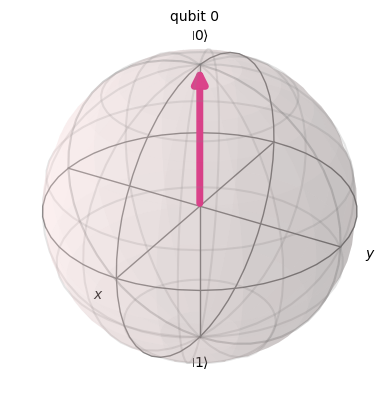

In [33]:
# Amplitude game circuit
num_qubits = 1
qc = qk.QuantumCircuit(num_qubits)

# ???

print(qc)

psi = Statevector(qc)
print("|psi> = ", psi.data)
plot_bloch_multivector(qc)


## **QC SANDBOX #2 - Bell states**

When dealing with more than one qubit, we can use the same commands for applying gates and checking the coefficients of the final state. The latter action, though, might not be as convenient, because the number of coefficients grows exponentially with the number of qubits, and *the order* they are listed with *can be tricky* on Qiskit!

Remember that a generic state of two qubits is
$$ \ket{\psi} = a\ket{00}+b \ket{01}+c\ket{10}+d \ket{11}$$

However, Qiskit orders qubit indices differently, in reversed ("little-endian") order, that is

In [15]:
# Create a circuit with more qubits
num_qubits = 4
qc = qk.QuantumCircuit(num_qubits)

# Apply a layer of single qubit gates
for n in range(num_qubits):
    qc.h(n)

# Apply a CNOT gate, remember to specify both target and control!
control_qubit_index = 0
target_qubit_index = 1
qc.cx(control_qubit_index, target_qubit_index)

# Draw a graphical representation of the circuit
print(qc)

# Compute the state of corresponding to the quantum circuit
psi = Statevector(qc)
print("|psi_final> = ", psi.data)

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     ├───┤└───┘
q_2: ┤ H ├─────
     ├───┤     
q_3: ┤ H ├─────
     └───┘     
|psi_final> =  [0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]


We have seen that the combination of H+CNOT generates entanglement. We build a Bell state like this

For a system of two qubits, we can find other 3 maximally entangled states, also sometimes called Bell states. The 4 Bell States are
$$\begin{split} &\ket{\Phi^+} = \frac{1}{\sqrt{2}} ( \ket{00} + \ket{11}) \\ &\ket{\Phi^-} = \frac{1}{\sqrt{2}} ( \ket{00} - \ket{11}) \\ &\ket{\Psi^+} = \frac{1}{\sqrt{2}} ( \ket{01} + \ket{10}) \\ &\ket{\Psi^-} = \frac{1}{\sqrt{2}} ( \ket{01} - \ket{10}) \end{split} $$
We challenge you to create the remaining three. As earlier, we will need the help of a CNOT gate. 


In [27]:
# Create a circuit to realise the 3 remaining Bell states
num_qubits = 6
qcBells = qk.QuantumCircuit(num_qubits)

# ...

print(qcBells)

     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     


We are now familiar with the idea that the squared modulus of each amplitude gives us the probability of finding the qubits in a certain state of the computational basis. We also know that a single measurement does not tell us much about the qubits. We need instead to run the circuit and measure many times, to collect enough data to estimate the probabilities and reconstruct what the qubits’ state was before the measurement. 
 
Let’s see what this means in practice for the Bell state $\ket{\Phi^-}$. By looking at it, we can read that we have equal probability 1/2 of finding the qubits in |00> or |11>. This means that half the times we run the experiments (“shots”) we should get 00 as output, and 11 the other half. What happens if we run the experiments only 1, 5, or 10 times? 
 
Increase the number of shots to see a more and more accurate estimation of the probabilities. 

Let's learn how to run a quantum circuit, first on a simulator

In [4]:
# Set AerSimulator from Qiskit as a backend to run the circuit
sim_bknd = AerSimulator()

# Create the quantum circuit and add a measurement at the end
qc = qk.QuantumCircuit(2)
qc.measure_all()

# Run the circuit on the AerSimulator backend and get the results
num_shots = 1000
res = sim_bknd.run(qc, shots = 1).result()

# Print the results 
print("Measurement outcomes\n", res.get_counts())

Measurement outcomes
 {'00': 1}


Increase the number of shots and see how the histogram changes

## **QC SANDBOX #3 - Teleportation protocol**

We’ll guide you throuugh the steps of the algorithm, but the actual code is on you! Decide if you want to write it cell by cell, or all together at the end


##### 1 -  Three qubits are involved the protocol. Alice has two qubits with her, Bob has the third one.
Qubits are initialised in state $\ket{000}$

In [ ]:
##### Your turn! ######

##### 2 - Alice and Bob share a pair of entangled qubits in $\ket{\Phi^+} $
Qubits are in state $\ket{0}\ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{000} + \ket{011})$

In [ ]:
###########

##### 3 - Alice encodes in the first qubit an unknown state $\ket{\psi} = a\ket{0} + b \ket{1}$ to teleport
Prepare an arbitrary state on the third qubit for Alice — you will know it but Alice and Bob don’t. At this point, qubits should be in state $\ket{\psi}\ket{\Phi^+} = a \ket{0} \ket{\Phi^+} + b \ket{1} \ket{\Phi^+} = \frac{1}{\sqrt{2}} \bigl[a (\ket{000} + \ket{011}) + b (\ket{100} + \ket{111}) \bigr]$

In [ ]:
###########

##### 4 - Alice wants to entangle her two qubits — of course she uses a CNOT on qubit 1 and 2 and a Hadamard gate on qubit 1
Pheeew, the expression for the state is quiet long, but bear with us $$H \frac{1}{\sqrt{2}} \bigl[a (\ket{000} + \ket{011}) + b (\ket{110} + \ket{101}) \bigr] =\frac{1}{\sqrt{2}} \Biggl[ a \biggl(\frac{\ket{0}+\ket{1}}{\sqrt{2}}\ket{00} + \frac{\ket{0}+\ket{1}}{\sqrt{2}}\ket{11} \biggr) + b \biggl(\frac{\ket{0}-\ket{1}}{\sqrt{2}}\ket{10} + \frac{\ket{0}-\ket{1}}{\sqrt{2}}\ket{01} \biggr) $$

##### 5 - Alice measures her 2 qubits. To understand why, let’s give a look at the state. She has equal probability 1/ 4 to measure either 00, 10, 01, or 11
The long expression above can in fact be rewritten in a more useful way — feel free to verify it yourself for practice
$$\frac{1}{2} \biggl[ \ket{00}( \alpha\ket{0} + \beta \ket{1}) + \ket{10} ( \alpha\ket{0} - \beta \ket{1})  + \ket{01}( \alpha\ket{1} + \beta \ket{0}) + \ket{11} ( \alpha\ket{1} - \beta \ket{0}) \biggr] $$

In [ ]:
###########

##### 6 - Alice sends Bob the bitstring she got as a result— a piece of classical information, not quantum!
##### Measuring her qubits, Alice perturbed the system and irretrievably lost |\psi>. But Bob can act on his qubit according to the message received to obtain state $\ket{\psi}$!
By looking at the expression above, we can infer that if Alice measures <br>
$00 \ \longrightarrow$ Bob's qubit is in $a\ket{0} + b \ket{1} \  \longrightarrow$ Bob does nothing, he already has $\ket{\psi}$ <br>
$10 \ \longrightarrow$ Bob's qubit is in $a\ket{0} - b \ket{1} \  \longrightarrow$  Bob applies gate $Z$ <br>
$01 \ \longrightarrow$ Bob's qubit is in $a\ket{1} + b \ket{0} \  \longrightarrow$ Bob applies gate $X$ <br>
$11 \ \longrightarrow$ Bob's qubit is in $a\ket{1} - b \ket{0}\  \longrightarrow$ Bob applies $X$ first then $Z$<br>


In [36]:
###########
## if outcome == 11
######
